<a href="https://colab.research.google.com/github/will787/layoffs-case/blob/main/layoffs_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/layoffs_data.csv")

df.head()

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Company                     3642 non-null   object 
 1   Location_HQ                 3642 non-null   object 
 2   Industry                    3642 non-null   object 
 3   Laid_Off_Count              2389 non-null   float64
 4   Date                        3642 non-null   object 
 5   Source                      3642 non-null   object 
 6   Funds_Raised                3252 non-null   float64
 7   Stage                       3642 non-null   object 
 8   Date_Added                  3642 non-null   object 
 9   Country                     3642 non-null   object 
 10  Percentage                  2342 non-null   float64
 11  List_of_Employees_Laid_Off  3642 non-null   object 
dtypes: float64(3), object(9)
memory usage: 341.6+ KB


In [5]:
df.describe()

,Laid_Off_Count,Funds_Raised,Percentage
count,2389.000000,3252.000000,2342.000000
mean,257.926329,798.569494,0.281216
std,829.432277,4758.393161,0.287294
min,3.000000,0.000000,0.000000
25%,40.000000,51.000000,0.100000
50%,80.000000,166.000000,0.170000
75%,181.000000,469.250000,0.300000
max,14000.000000,121900.000000,1.000000


In [6]:
df.values

array([['Oda', 'Oslo', 'Food', ..., 'Norway', nan, 'Unknown'],
       ['Pagaya', 'Tel Aviv', 'Finance', ..., 'Israel', 0.2, 'Unknown'],
       ['Aleph Farms', 'Tel Aviv', 'Food', ..., 'Israel', 0.3, 'Unknown'],
       ...,
       ['Panda Squad', 'SF Bay Area', 'Consumer', ..., 'United States',
        0.75, 'Unknown'],
       ['Tamara Mellon', 'Los Angeles', 'Retail', ..., 'United States',
        0.4, 'Unknown'],
       ['EasyPost', 'Salt Lake City', 'Logistics', ..., 'United States',
        nan, 'Unknown']], dtype=object)

In [7]:
df.columns

Index(['Company', 'Location_HQ', 'Industry', 'Laid_Off_Count', 'Date',
       'Source', 'Funds_Raised', 'Stage', 'Date_Added', 'Country',
       'Percentage', 'List_of_Employees_Laid_Off'],
      dtype='object')

In [8]:
df.index

RangeIndex(start=0, stop=3642, step=1)

In [9]:
df.sort_values("Date", ascending=False)
#ordenando por data

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown


In [10]:
df.sort_values("Laid_Off_Count", ascending=False)

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
80,Tesla,Austin,Transportation,14000.0,2024-04-15,https://www.nytimes.com/2024/04/15/business/te...,20200.0,Post-IPO,2024-04-15 15:16:33,United States,0.10,https://docs.google.com/spreadsheets/d/1UCxvLd...
1543,Google,SF Bay Area,Consumer,12000.0,2023-01-20,https://www.nytimes.com/2023/01/20/business/go...,26.0,Post-IPO,2023-01-20 14:23:42,United States,0.06,Unknown
2027,Meta,SF Bay Area,Consumer,11000.0,2022-11-09,https://www.cnbc.com/2022/11/09/meta-to-lay-of...,26000.0,Post-IPO,2022-11-09 15:04:03,United States,0.13,Unknown
1218,Meta,SF Bay Area,Consumer,10000.0,2023-03-14,https://about.fb.com/news/2023/03/mark-zuckerb...,26000.0,Post-IPO,2023-03-14 15:19:25,United States,NaN,Unknown
1959,Amazon,Seattle,Retail,10000.0,2022-11-16,https://www.nytimes.com/2022/11/14/technology/...,108.0,Post-IPO,2022-11-16 17:40:58,United States,0.03,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3626,Vacasa,Portland,Travel,NaN,2020-03-20,https://www.bizjournals.com/portland/news/2020...,526.0,Series C,2020-03-28 20:52:49,United States,NaN,Unknown
3631,Anyvision,Tel Aviv,Security,NaN,2020-03-19,https://ipvm.com/reports/anyvision-20-layoffs,74.0,Series A,2020-03-30 13:58:13,Israel,NaN,Unknown
3632,Popin,New York City,Fitness,NaN,2020-03-19,https://www.businessinsider.com/fitness-app-po...,13.0,Unknown,2020-04-06 23:47:12,United States,1.00,Unknown
3633,Tuft & Needle,Phoenix,Retail,NaN,2020-03-19,https://www.theverge.com/2020/3/19/21185840/tu...,0.0,Acquired,2020-04-05 23:23:24,United States,NaN,Unknown


In [11]:
df_sorted = df.sort_values(by="Company")

#for company in df_sorted['Company']:
#    print(company)

In [12]:
df[["Company", "Industry"]].head(10)

#equals a :
#cols_analyze = ["Company", "Industry"]
#df[cols_analyze]

,Company,Industry
0,Oda,Food
1,Pagaya,Finance
2,Aleph Farms,Food
3,MoonPay,Crypto
4,Yext,Marketing
5,Microsoft,Other
6,OrCam,Healthcare
7,Google,Consumer
8,Tropic,Finance
9,Gro Intelligence,Food


In [13]:
df[df["Company"] > "2024-05-01"]

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
0,Oda,Oslo,Food,150.0,2024-06-05,https://techcrunch.com/2024/06/05/softbank-bac...,691.0,Unknown,2024-06-05 18:01:25,Norway,NaN,Unknown
1,Pagaya,Tel Aviv,Finance,100.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,2000.0,Post-IPO,2024-06-05 23:11:24,Israel,0.20,Unknown
2,Aleph Farms,Tel Aviv,Food,30.0,2024-06-05,https://www.calcalistech.com/ctechnews/article...,119.0,Unknown,2024-06-05 23:13:43,Israel,0.30,Unknown
3,MoonPay,Dover,Crypto,30.0,2024-06-05,https://www.theblock.co/post/298638/moonpay-la...,651.0,Unknown,2024-06-05 23:12:47,United States,0.10,Unknown
4,Yext,New York City,Marketing,NaN,2024-06-05,https://www.investing.com/news/economy-news/ye...,117.0,Post-IPO,2024-06-05 18:02:40,United States,0.12,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...
3637,Service,Los Angeles,Travel,NaN,2020-03-16,https://techcrunch.com/2020/03/16/travel-savin...,5.1,Seed,2020-08-31 15:17:26,United States,1.00,Unknown
3638,HopSkipDrive,Los Angeles,Transportation,8.0,2020-03-13,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,45.0,Unknown,2020-04-03 04:47:03,United States,0.10,Unknown
3639,Panda Squad,SF Bay Area,Consumer,6.0,2020-03-13,https://twitter.com/danielsinger/status/123854...,1.0,Seed,2020-04-17 00:12:49,United States,0.75,Unknown
3640,Tamara Mellon,Los Angeles,Retail,20.0,2020-03-12,https://layoffs.fyi/list/tamara-mellon/,90.0,Series C,2020-03-31 16:04:23,United States,0.40,Unknown


In [14]:
is_google = df["Company"] == "Google"
is_meta = df["Company"] == "Meta"

df[is_google]

,Company,Location_HQ,Industry,Laid_Off_Count,Date,Source,Funds_Raised,Stage,Date_Added,Country,Percentage,List_of_Employees_Laid_Off
7,Google,SF Bay Area,Consumer,100.0,2024-05-31,https://www.businessinsider.com/google-cloud-l...,26.0,Post-IPO,2024-06-01 18:35:17,United States,NaN,Unknown
34,Google,SF Bay Area,Consumer,57.0,2024-05-10,https://www.sfchronicle.com/tech/article/tech-...,26.0,Post-IPO,2024-05-11 14:41:00,United States,NaN,Unknown
51,Google,SF Bay Area,Consumer,200.0,2024-05-01,https://www.cnbc.com/2024/05/01/google-cuts-hu...,26.0,Post-IPO,2024-05-02 15:16:08,United States,NaN,Unknown
57,Google,SF Bay Area,Consumer,NaN,2024-04-30,https://techcrunch.com/2024/04/29/google-lays-...,26.0,Post-IPO,2024-04-30 15:00:29,United States,NaN,Unknown
76,Google,SF Bay Area,Consumer,NaN,2024-04-17,https://www.reuters.com/technology/google-lays...,26.0,Post-IPO,2024-04-18 04:47:02,United States,NaN,Unknown
276,Google,SF Bay Area,Consumer,NaN,2024-01-22,https://www.bloomberg.com/news/articles/2024-0...,26.0,Post-IPO,2024-01-23 16:12:00,United States,NaN,Unknown
288,Google,SF Bay Area,Consumer,NaN,2024-01-16,https://www.businessinsider.com/google-is-layi...,26.0,Post-IPO,2024-01-30 16:42:08,United States,NaN,Unknown
309,Google,SF Bay Area,Consumer,1000.0,2024-01-10,https://www.theverge.com/2024/1/11/24034124/go...,26.0,Post-IPO,2024-01-11 14:42:18,United States,NaN,Unknown
460,Google,SF Bay Area,Consumer,NaN,2023-11-08,https://www.theinformation.com/briefings/googl...,26.0,Post-IPO,2023-11-09 18:32:46,United States,NaN,Unknown
506,Google,SF Bay Area,Consumer,40.0,2023-10-18,https://www.cnbc.com/2023/10/18/google-cuts-do...,26.0,Post-IPO,2023-10-19 00:46:45,United States,NaN,Unknown


In [27]:
# is_meta_or_google = df["Company"].isin(["Google", "Meta"])#
# df[is_meta_or_google]
df = df.drop(df.columns[5],axis=1)

In [64]:
count_cat = df["Industry"].value_counts().drop("Unknown")
print(count_cat)

Industry
Finance           451
Retail            297
Healthcare        296
Transportation    226
Other             223
Food              213
Consumer          207
Marketing         178
Real Estate       151
Crypto            144
Education         142
Media             137
Security          121
Data              116
Travel             97
HR                 97
Infrastructure     66
Logistics          64
Sales              56
Support            54
Hardware           50
Recruiting         49
Product            48
Fitness            42
Energy             30
Construction       24
Manufacturing      18
Legal              18
Aerospace          16
AI                 10
Name: count, dtype: int64


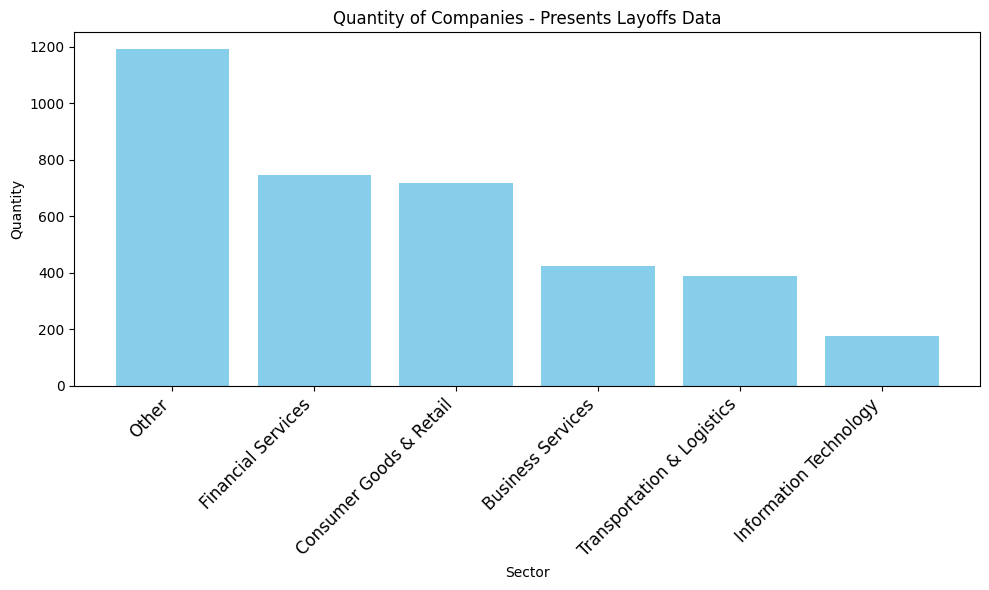

In [81]:
def categorize_sector(industry):
  if industry in ['Finance', 'Real Estate', 'Crypto']:
      return 'Financial Services'
  elif industry in ['Retail', 'Consumer', 'Food']:
      return 'Consumer Goods & Retail'
  elif industry in ['Transportation', 'Logistics', 'Travel']:
      return 'Transportation & Logistics'
  elif industry in ['Marketing', 'Media', 'Sales', 'Support']:
      return 'Business Services'
  elif industry in ['Data', 'Hardware', 'Software', 'AI']:
      return 'Information Technology'
  else:
      return 'Other'

df['Sector'] = df['Industry'].apply(categorize_sector)

ilustrate_visualize = df['Sector'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(ilustrate_visualize.index, ilustrate_visualize.values, color='skyblue')
plt.ylabel("Quantity")
plt.xlabel("Sector")
plt.title("Quantity of Companies - Presents Layoffs Data")

plt.xticks(rotation=45, ha='right', fontsize=12)

plt.subplots_adjust(left=0.2)

plt.tight_layout()
plt.show()

In [ ]:
\